# Trabajo Semanal 4 bis²
***

<img src="./Especificaciones.png" align="center" /> 

In [2]:
# Inicialización e importación de módulos

# Módulos externos
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import math

from matplotlib import pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, bodePlot, pzmap, tf2sos_analog, pretty_print_SOS

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

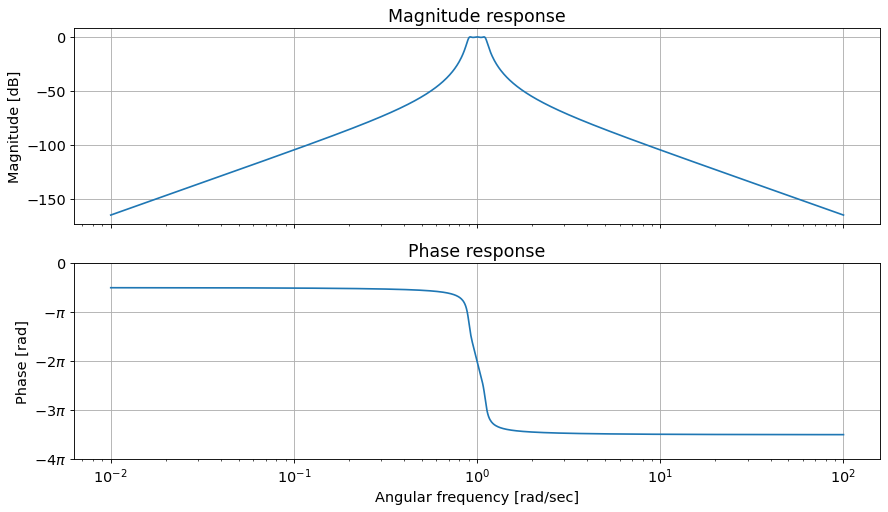

In [6]:
#Datos de enunciado para filtro pasa banda
a_max = 0.5
a_min1 = 16
a_min2 = 36

fs1 = 17*(10**3)
fs2 = 36*(10**3) 

Q = 5
w0 = 2*np.pi*22*(10**3)

nf = w0 #norma de frecuencia

w0_n = w0/nf
Bw_n = w0_n/Q

#como w0²=(w1.w2) y Bw=(w2-w1) => 1=(w1.w2) y 1/5=(w2-w1) => w2=1/w1 y 1/5=(1/w1-w1)
wp1_n1 = (-Bw_n+np.sqrt(Bw_n**2-(4*1*-1)))/(2*1)
wp1_n2 = (-Bw_n-np.sqrt(Bw_n**2-(4*1*-1)))/(2*1)

if wp1_n1 < 0:
    wp1_n = wp1_n2
else:
    wp1_n = wp1_n1
    
wp2_n = 1/wp1_n

ws1_n = (2*np.pi*fs1)/nf
ws2_n = (2*np.pi*fs2)/nf 

#conversión de parámetros para un filtro pasa bajos equivalente
Wp1_n = round(Q*(wp1_n**2 - w0_n**2)/wp1_n, 3)
Wp2_n = round(Q*(wp2_n**2 - w0_n**2)/wp2_n, 3)
Ws1_n = round(Q*(ws1_n**2 - w0_n**2)/ws1_n, 3)
Ws2_n = round(Q*(ws2_n**2 - w0_n**2)/ws2_n, 3)

Wp_n = math.fabs(Wp1_n)

#Obtención de epsilon y n
e2 = round(10**(a_max/10) - 1, 1)

for aux_n in range(2,5):
    aux_a_min = 10*np.log10(1 + e2*np.cosh(aux_n*np.arccosh(math.fabs(Ws1_n)))**2)
        
    if aux_a_min > a_min1:
        n1 = aux_n
        break
        
for aux_n in range(2,5):
    aux_a_min = 10*np.log10(1 + e2*np.cosh(aux_n*np.arccosh(math.fabs(Ws2_n)))**2)
    
    if aux_a_min > a_min2:
        n2 = aux_n
        break        

if n1 < n2:
    n = n1
else:
    n = n2
        
z,p,k = sig.cheb1ap(n, a_max)
num_lp_n, den_lp_n = sig.zpk2tf(z,p,k)

sos_lp = tf2sos_analog(num_lp_n, den_lp_n)

pretty_print_lti(num_lp_n, den_lp_n)
pretty_print_SOS(sos_lp, mode='omegayq')


num_bp_n, den_bp_n = sig.lp2bp(num_lp_n, den_lp_n, w0_n, Bw_n)
sos_bp = tf2sos_analog(num_bp_n, den_bp_n)

pretty_print_lti(num_bp_n, den_bp_n)
pretty_print_SOS(sos_bp, mode='omegayq') #factorizando


H_bp_n = sig.TransferFunction(num_bp_n, den_bp_n)
bodePlot(H_bp_n)